# 1.5.2 - Beginner - Introduction to Data Visualization II

COMET Team <br> *Anneke Dresselhuis, Jonathan Graves*  
2023-01-12

## Outline

### Prerequisites

-   Introduction to Jupyter
-   Introduction to R
-   Introduction to Data Visualization 1

### Outcomes

By the end of this notebook, you will be able to:

-   Customize aesthetic labels on a graph to communicate the key message
    of a visualization
-   Use faceted graphs to visually represent complex data
-   Identify best practices for creating effective visualizations
-   Recognize ways in which visualizations can be used nefariously

### References

-   Deeb, Sameer. 2005. “The Molecular Basis of Variation in Human Color
    Vision.” *Clinical Genetics* 67: 369–77.

## Introduction

This notebook expands on the concepts introduced in Introduction to Data
Visualization 1 and explores ways to create more layering customizations
that can help make our visualizations look extra polished.

> **Note**: we use a substantial amount of charts in this notebook. If
> the charts are not rendering properly, try adjusting the following
> parameters in the plot codes: options(repr.plot.width = 15,
> repr.plot.height = 9). `repr.plot.width` is the plot width and
> `repr.plot.height` is the plot height.

We’ll also see how our new tools perform in a few case study examples.

Because we’re already familiar with the theoretical concepts of
`ggplot2`, **this notebook serves as more of a** **resource guide with
practical case study examples than as a learning module.**

In this notebook, we’ll be working with the Penn World Tables data set
again. Let’s load it now.

In [ ]:
source("beginner_intro_to_data_visualization2_tests.r")

In [ ]:
# import packages
library(tidyverse) # contains ggplot2, which is what we'll be using!
library(haven)
library(RColorBrewer)
library(ggthemes)

# library(lubridate)

# load the data
pwt_data <- read_dta("../datasets_beginner/pwt100.dta")

# declare factors
pwt_data <- as_factor(pwt_data)

pwt_data <- pwt_data %>%
    mutate(countrycode = as.factor(countrycode)) %>%
    mutate(country = as.factor(country)) %>%
    mutate(currency_unit = as.factor(currency_unit))

NA_data <- filter(pwt_data, (countrycode == "CAN")|(countrycode == "USA"))

# check that it looks OK
tail(NA_data,10)
# there will be a lot of missing data

## Part 1: Adding to our Data Visualization Toolkit

In notebook 1 we introduced the `labs()` function which allows us to
specify the aesthetic outputs of different labels on our chart, such as
the x and y axis titles, the legend title and main graph title.

Here are a few best practices to keep in mind when crafting and adding
labels to charts (pulled from [FusionCharts
2022](https://www.fusioncharts.com/resources/charting-best-practices/5-tips-for-writing-chart-captions)):

-   Graph title: should summarize the graph in short, understandable
    language that is as objective as possible - avoid using unnecessary
    words such as “the”, “a”, or “an”, as well as adjectives like
    “amazing” or “poor” which can manipulate your reader’s perception of
    the graphic.

    -   Example: *“Online Grocery Order Growth 2018 vs 2020”* (a better
        title) vs *“The Significant Growth in Online Grocery Orders in
        the years 2018 and 2020”* (a worse title)

-   Graph subtitle: should be used to add helpful supplemental
    information that will help your audience understand the graph.

    -   Example: Units of measurement, time frames (if this is secondary
        information)

-   Axis Labels: units of measurement should always be made known! If
    the data is labeled inside the visualization, sometimes axis labels
    are not necessary - we should always ask ourselves: what does our
    audience need to know?

Here, we explore a few tips and tricks for customizing labels to suit
the needs of our graph.

### The `labs()` function

As a refresher, a few `labs()` arguments we’ve already covered are:

-   `x =` specifies x-axis title
-   `y =` specifies y-axis title
-   `color =` specifies meaning of color outline.
-   `fill =` specifies meaning of color fill
-   `title =` specifies title of plot

And here are some **new arguments**:

-   `subtitle =` specifies a subtitle for the graph (positioned below
    title)
-   `caption =` specifies a caption at the bottom of graph, which can be
    great for listing the source of our data

These arguments give us a basic infrastructure for a plot - we can
demonstrate these features using a simple bar chart.

In [ ]:
basic_plot <- ggplot(data = NA_data,  
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = country, # specifies the fill to be by country
                    color = country)) + # specifies the outline to also be by country
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "countyr",
             title = "Canada & US Real GDP per Capita over Time") +
        geom_col(position = "dodge") +
        theme(text = element_text(size = 15)) # specifies the x, y and legend label text size
        options(repr.plot.width = 15, repr.plot.height = 9) # specifies the dimension 
  
basic_plot

### Test your knowledge

Fix the typo from the graph above (in the code below!) so that the two
legends on the right hand side are merged into one.

> **Hint**: remember that arguments in the `ggplot()` contain aesthetic
> mappings, while arguments in the `labs()` function contain labels and
> other specifications that are set by us and not the data.

In [ ]:
# replace the variable that is causing the error in the legend formatting by the correct variable

basic_plot_test <- ggplot(data = NA_data,  
                    aes(x = year,   
                    y = rgdpe/pop, 
                    fill = country, # specifies the fill to be by country
                    color = country)) + # specifies the outline to also be by country
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "countryr",
             title = "Canada & US Real GDP per Capita over Time") +
        geom_col(position = "dodge") +
        theme(text = element_text(size = 15)) # specifies the x, y and legend label text size
        options(repr.plot.width = 15, repr.plot.height = 9) # specifies the dimension 

basic_plot_test

In [ ]:
answer_1 <- basic_plot_test

test_1()

## Part 2: Adjusting Feautures of our Visualization

We also learned about the `theme()` function, which allows us to modify
components of a theme such as text. One `theme()` argument we’ve already
covered is `text = element_text()`, which specifies text attributes that
broadly apply to all text components in a graph (titles, labels,
captions, …).

And here are some **new arguments**:

-   `plot.title = element_text()` allows specifications for the title
    text.

-   `plot.subtitle.title = element_text()` allows specifications for the
    subtitle text.

-   `plot.caption = element_text()` allows specifications for the
    caption text.

-   `axis.text.x = element_text()` allows specifications for x axis
    text.

-   `axis.text.y = element_text()` allows specifications for y axis
    text.

-   `legend.position =` allows specifications for legend position.

    -   Example: `"top"`, `"bottom"` or as a vector (i.e.,
        `c(x-coordinate, y-coordinate)`)

-   Always ensure that the text is readable to an audience with a range
    of seeing abilities.

-   Adjusting label size and boldness can help us emphasize important
    information about a graph that we’d like our audience to focus on.
    Check out more `theme()` arguments in [this documentation resource
    created by R
    Studio](https://ggplot2.tidyverse.org/reference/theme.html).

### The `element_text()` function

There are also a quite a few things we can specify using the
`element_text()` function:

-   `size =` specifies x-axis title (default in R is set at size 11).
-   `hjust =` specifies the position of the plot titles (default is
    left).
    -   `0.5`: centre, `1`: right, `0`: left
-   `color =` specifies the text color.
-   `face =` specifies typographical emphasis.
    -   Example: `"bold"`, `"italic"`, `"bold.italic"`
-   `angle =` specifies angular rotation of text.
-   `vjust =` specifies the vertical adjustment.
    -   Example: higher number is up, lower number is down from the
        graph (default is 0).

Let’s use some of these new functions and arguments to improve our
earlier visualization!

In [ ]:
intermediate_plot <- ggplot(data = NA_data,  
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = country, 
                    color = country,
                    geom_text(mapping = country))) +
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "Canada & US Real GDP per Capita over Time", subtitle = "1950-2019", 
             caption = "Source: Penn World Tables 2019") +
        geom_col(position = "dodge") +
        theme(text = element_text(size = 15)) + # specifies the x, y and legend label text size
        theme(plot.title = element_text(size = 20, hjust = 0.5, color = "black", face = "bold")) + # specifies title text details
        theme(plot.subtitle = element_text(size = 19, hjust = 0.5)) +  # specifies subtitle text details
        theme(plot.caption = element_text(size = 15, face = "italic", vjust = 0)) + # specifies caption text details
        theme(legend.position = "top")  # places the legend at the top of the graph
        options(repr.plot.width = 15, repr.plot.height = 9) 

intermediate_plot

### Scales

To visualize only a subsection of our data we can use the following
commands which manipulate the scale of our graphs:

-   `xlim()` specifies scale adjustments on the x-axis.
-   `ylim()` specifies scale adjustments on the y-axis.

Both of these functions take two arguments - one lower bound limit and
one upper bound limit.

-   We can use the `xlim()` and `ylim()` functions to examine
    subsections of our axis variables.
-   In the GDP per capita over time plot that we’ve been working with,
    use `xlim()` to view a subsection of data from 2000-2019 below. This
    will make the power of changing the scale of our graph much more
    obvious.

> **Note**: scaling can occur on any quantitative attribute; that is, we
> can scale other variables in addition to year.

In [ ]:
scaled_plot <- ggplot(data = NA_data,  
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = country, 
                    color = country)) +
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "Canada & US Real GDP per Capita over Time", subtitle = "2000-2019",  # adjust the subtitle to reflect the window of time we're working with
             caption = "Source: Penn World Tables 2019") +
        geom_col(position = "dodge") +
        theme(text = element_text(size = 15, hjust = 0)) + 
        theme(plot.title = element_text(size = 20, hjust = 0.5, color = "black", face = "bold")) +
        theme(plot.subtitle = element_text(size = 19, hjust = 0.5)) +  
        theme(plot.caption = element_text(size = 15, face = "italic", vjust = 0)) + 
        theme(legend.position = "top") +
        xlim(2000,2019) + # adjust x-axis scale with lower bound = 2000 and upper bound = 2019
        ylim(0,200000) # adjust the max y value to 200,000 rather than the automatic scale of ~64,000
        options(repr.plot.width = 15, repr.plot.height = 9) 

scaled_plot

*What do you notice about this graph? How do the oscillations (ups and
downs) appear different when zoomed in here versus in the large view in
the other visualization?*

> **🔎 **Let’s think critically****
>
> > 🟠 What are some good reasons why we might want to adjust the scale
> > limits of our axis?  
> > 🟠 Is there a subsection of data that would be of interest? Why?  
> > 🟠 Are we trying to make our oscillations seem less volatile (as
> > seen above) to prove a point? What point?  
> > 🟠 Are our scale choices helping our audience gain an understanding
> > of the data that is as objective and accurate as possible?

Scaling is important because it can communicate a variety of different
messages depending on how it is used.

### Faceting

Let’s say instead of creating one plot at a time, we’re interested in
piecing together a visualization that takes on a more dashboard-like
effect to display multiple plots in a grid simultaneously.

-   A function we can use to achieve this is `facet_grid()`. To *facet*
    something simply means to split it.
-   Faceting allows us to arrange graphs into multiple views or layers
    which can help us explore multidimensionality and visualize
    complexity in a dataset.

Some arguments of `facet_grid()` are:

-   `facet_grid(rows = vars(variable))` creates a grid of plots using a
    variable or variables split into rows (horizontal split) or columns
    (vertical split).
-   The `vars()` function allows our variable(s) of choice to be
    correctly evaluated in the context of the data frame.
-   `geom_hline()` creates a *horizontal* line across our plot(s) at a y
    value of our choosing.
-   `geom_vline()` creates a *vertical* line across our plot(s) at an x
    value of our choosing.

Both `geom_hline()` and `geom_vline()` can be used on single plots and
subplots to emphasize particular thresholds, values or time periods. In
the graph below, we’ll add a horizontal line to our faceted plot to help
us see when the GDP from each G7 country rose above 40,000.

In [ ]:
g7_data <- pwt_data %>%
filter(country == "Canada" | country == "United States" | country == "France" | 
       country == "Germany" |  country == "Italy" |  country == "Japan" | country == "United Kingdom")  # select G7 countries  

facet_plot <- ggplot(data = g7_data,      
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = as_factor(country), 
                    color = country)) +
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "G7 GDP per Capita over Time", subtitle = "1950-2019", 
             caption = "Source: Penn World Tables 2019") +
        geom_line(size = 2) +
        theme(text = element_text(size = 18, hjust = 0)) +
        theme(text = element_text(size = 20, hjust = 0)) + 
        theme(plot.title = element_text(size = 25, hjust = 0.5, color = "black", face = "bold")) + 
        theme(plot.subtitle = element_text(size = 19, hjust = 0.5)) +  
        theme(plot.caption = element_text(size = 10, face = "italic", vjust = 0)) + 
        theme(legend.position = "top") +
        geom_hline(yintercept = 40000, linetype = "solid", size = 0.25) + # add horizontal line 
        facet_grid(rows = vars(country)) + # create a set of subplots organized by country
        scale_color_brewer(palette="Paired")
        options(repr.plot.width = 15, repr.plot.height = 9) 


facet_plot

Faceting allows us to arrange charts to make comparisons clearly.
Without faceting, a consolidated line chart of all G7 countries such as
the one below might look overcrowded difficult to observe the nuances
between countries.

In [ ]:
line_plot <- ggplot(data = g7_data,      
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = as_factor(country), 
                    color = country)) +
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "G7 GDP per Capita over Time", subtitle = "1950-2019", 
             caption = "Source: Penn World Tables 2019") +
        geom_line(size = 2) +
        theme(text = element_text(size = 18, hjust = 0)) +
        theme(text = element_text(size = 20, hjust = 0)) + 
        theme(plot.title = element_text(size = 25, hjust = 0.5, color = "black", face = "bold")) + 
        theme(plot.subtitle = element_text(size = 18, hjust = 0.5)) +  
        theme(plot.caption = element_text(size = 15, face = "italic", vjust = 0)) + 
        theme(legend.position = "top") +
        geom_hline(yintercept = 40000, linetype = "solid", size = 0.25) + # add horizontal line +
        scale_color_brewer(palette="Paired")
        options(repr.plot.width = 15, repr.plot.height = 9) 

line_plot

We can see that this graph above, while it is quite consolidated, does
not present the specific patterns of each country as clearly as does our
faceted graph immediately before it.

### Confidence Bands

When creating visualizations that use a predictive element like a
regression line, we can summon graph features that visualize how
accurate our model is at predicting a variable(s) with 95% confidence.

The function `geom_smooth()` creates a trendline that aids the eye in
spotting patterns in the data. Arguments within this function include:

-   `method =` specifies the type of smoothing we want to use - in this
    notebook, we’ll use linear regression using the `lm` function
-   `se =` uses a logical argument to specify the presence of a standard
    error/confidence band (default is `TRUE`)
-   `colour =` specifies the colour of the trendline
-   `fill =` specifies the colour of the confidence band

## Part 3: Chart Design

Before we move into some case studies, we’ll examine a few more design
tips and tricks that we can add to our visualization toolkit to make our
visualizations look extra polished ✨

### Shapes

-   `pch =` Allows us to change the shape of the data points using the
    argument on scatter plot to distinguish sets of data.
    -   E.g., Option 2 (the upwards triangle icon) could indicate growth
        or movement upwards, whereas option 6 (the downwards triangle
        icon) could indicate decline or movement downwards.

The shape options are listed in the chart below - the default, as we’ve
seen before, is 19, a simple circle. Note that numbers 21-25 are shapes
that have both fill and outline colour options which can be helpful if
we are trying to make our data points stand out better. This is
particularly useful if we are working with a large data set.

<figure>
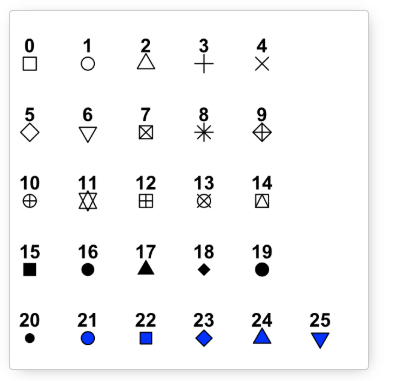
<figcaption aria-hidden="true">Geom point shape options</figcaption>
</figure>

Try exploring a few different shape and size options in the scatterplot
below!

In [ ]:
intermediate_scatterplot <- ggplot(data = NA_data,  
                aes(x = hc,   
                    y = rgdpe/pop, 
                    fill = country, 
                    color = country,
                    geom_text(mapping = country))) +
        labs(x = "Human Capital",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "Canada & US Real GDP per Capita and Human Capital", subtitle = "1950-2019", 
             caption = "Source: Penn World Tables 2019") +
        geom_point(pch = 19, size = 2) + # try exploring a few different shape and size options 
        theme(text = element_text(size = 20, hjust = 0)) + 
        theme(plot.title = element_text(size = 25, hjust = 0.5, color = "black", face = "bold")) +
        theme(plot.subtitle = element_text(size = 19, hjust = 0.5)) +  
        theme(plot.caption = element_text(size = 15, face = "italic", vjust = 0)) + 
        theme(legend.position = "top")  
        options(repr.plot.width = 15, repr.plot.height = 9) 

intermediate_scatterplot

### Colour

In our last notebook, we introduced the `RColorBrewer` theme options and
specifications such as `"blue"` or `"Set3"`. Colours can also be set
using hexadecimal colour codes, which are six digit codes that store
information about a color by various levels of red (R), green (G), and
blue (B) like this: (#RRGGBB).

For example:

-   “#FF0000” (red)
-   “#FF6347” (orange)
-   “#FFD700” (yellow)

Key points to remember:

-   Choose diverse colours when making comparisons
-   Use colour hue (i.e., the lightness or darkness of a colour) when
    demonstrating concentration or other quantitative measures
-   Too many colours may distract your audience from the main message of
    the visualization (less than 10 is recommended)
-   Be aware of colour semantics which can vary depending on culture
    -   For example, in the West, green might be used to indicate
        growth, while red might be used to indicate loss or warning
-   While the default background colour for visualization in R is a pale
    grey colour, a white background can make a visualization look a bit
    cleaner and allow colours to stand out better

To change our background colour, we can add layers to our ggplot
visualizations with functions from the package `ggthemes()`. Some of the
functions include:

-   `theme_bw()` white background, grey gridlines, black graph border
-   `theme_minimal()` white background, grey gridlines, no graph border
-   `theme_classic()` white background, no gridlines, no graph border
-   `theme_economist()`: a theme based on the plots in the [The
    Economist magazine](https://www.economist.com/)
-   `theme_hc()`: a theme based on [Highcharts
    JS](https://www.highcharts.com/)
-   `theme_wsj()`: a theme based on the plots in the [The Wall Street
    Journal](https://www.wsj.com/)

You can read more about
[ggthemes](https://mran.microsoft.com/snapshot/2016-12-28/web/packages/ggthemes/vignettes/ggthemes.html)
here.

When working with colours, it’s important use colours that accommodate
those who are colourblind.

We can view a list of colourblind friendly palettes using the following
command:

In [ ]:
display.brewer.all(colorblindFriendly = TRUE)

Alternatively, once we have completed and exported a visualization, we
can run it through a [Colour Blindness
Simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/)
like this one to test if our visualization looks okay from the
perspective of those who have different colour blindness or impairment
conditions.

### Test your knowledge

Let’s now apply what we’ve learned with a few case studies. We will try
to recreate a few different types of graphs with our PWT dataset!

#### Scatterplots

Let’s see if we can use our tools to recreate a graph similar to the one
below using our PWT data set.

It’s highly recommended that you try to recreate the chart on your own
before answering the questions below. The best way to learn data
visualization in R is through practice.

In [ ]:
# try it yourself here

# use `rgdpe` as the measure for gdp

# to help you out: here is a vector with the countries we used in the plot

list_of_countries <- c("Peru", "Brazil", "Paraguay", "Colombia", "Uruguay", "Guatemala", "Chile", "Argentina", "Suriname", "Ecuador", "Bolivia", "Venezuela (Bolivarian Republic of)", "Mexico", "Nicaragua", "El Salvador", "Honduras", "Guyana", "Dominican Republic")

Once you’ve given this chart a try, answer the questions below to verify
your understanding:

What command did we use for plotting the data?

In [ ]:
# Fill in the ... with your answer below (example: "geom_histogram")
answer_2 <- "geom_..."

test_2()

What aesthetics did we use to build the plot? Remember that the
structure of `aes` is:

aes(x = …, y = …/…, size = …)

In [ ]:
# Fill in the "..." with the variables used - don't add or remove any of the quotations!
x <- "..."
y <- ".../..."
size <- "..."

answer_3 <- paste(x, y, size)   # don't change this

test_3()

How did we label our axes, legend, and subtitle? Make sure your answers
are written exactly like the plot.

In [ ]:
# Fill in the ... with the labels used - don't add or remove any of the quotations or commas!

answer_4 <- "labs(x = ..., y = ..., size = ..., subtitle = ...)"

test_4()

How did we plot the line of best fit? Select the option that best
completes the code skeleton below.

…(… = lm, se = …)

1.  geom_point, method, FALSE
2.  geom_smooth, fit, TRUE
3.  geom_line, method, FALSE
4.  geom_point, fit, TRUE
5.  geom_smooth, method, FALSE
6.  geom_line, fit, TRUE

In [ ]:
# Enter your answer as "A", "B", "C", "D", "E" or "F"
answer_5 <- "..."

test_5()

#### Confidence bands

Now, let’s see if you can replicate a plot that uses a confidence band.

In [ ]:
# here is the data we're going to use
confidence_data <- pwt_data %>%
    filter(country == "Canada") %>%
    mutate(adjusted_gdp = rgdpe/pop)

Here is the plot that you have to replicate.

Try to replicate it yourself and then compare it to the actual code
below. Don’t worry if you don’t get everything right on the first try.
Plot design is supposed to be iterative! Make sure you get the most
important parts first, and then try adding the special features.

In [ ]:
# your code here

#### Confidence bands: answer key

In [ ]:
confidence_plot <- ggplot(confidence_data, aes(x = hc, y = adjusted_gdp)) +
    geom_point(colour = "red", size = 3) + # set our data points to be a distinct colour from our confidence interval
    labs(x = "Human Capital", y = "GDP per Capita", fill = "", title = "Human Capital and GDP Per Capita in Canada",
        subtitle = "1950-2019", caption = "95% confidence interval") +
    geom_smooth(method = lm, se = TRUE, colour = "black", size = 0.99, fill = "black") + # compute trendlines for the data
    theme_minimal() + # select a theme with a light grid background
    theme(text = element_text(size = 20), plot.caption = element_text(color = "grey")) # create a plot caption describing the confidence band d
    options(repr.plot.width = 15, repr.plot.height = 9) 

     
confidence_plot

We’ve covered a lot of content in this notebook. For further reading or
exploration, we recommend visiting the hyperlinks attached throughout
this module, as all of them are valuable resources for deepening your
understanding of visualization in R!